In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel("/Users/apple/Desktop/y4s2/capstone/week 2 data set/example data.xlsx")

In [3]:
df.head(10)

,Date,R1G,R1V,R1G value,R1V value,ratio
0,1991-01-02,-0.011700,-0.009000,98.83,99.10,0.997275
1,1991-01-03,-0.017404,-0.008274,97.11,98.28,0.988095
2,1991-01-04,-0.004428,0.000611,96.68,98.34,0.983120
3,1991-01-07,-0.019652,-0.015050,94.78,96.86,0.978526
4,1991-01-08,-0.001477,-0.002994,94.64,96.57,0.980014
5,1991-01-09,-0.008664,-0.010148,93.82,95.59,0.981483
6,1991-01-10,0.012258,0.007323,94.97,96.29,0.986291
7,1991-01-11,0.003159,-0.000727,95.27,96.22,0.990127
8,1991-01-14,-0.009132,-0.009146,94.40,95.34,0.990141
9,1991-01-15,0.004873,0.002937,94.86,95.62,0.992052


In [4]:
df.describe(include='all')

,Date,R1G,R1V,R1G value,R1V value,ratio
count,8314,8314.000000,8314.000000,8314.000000,8314.000000,8314.000000
mean,2007-06-27 12:34:48.814048768,0.000493,0.000447,761.792818,820.202371,0.887215
min,1991-01-02 00:00:00,-0.123463,-0.120101,93.820000,95.340000,0.569229
25%,1999-03-24 06:00:00,-0.004893,-0.004234,328.014586,404.813702,0.724563
50%,2007-06-28 12:00:00,0.000783,0.000637,460.198261,618.314268,0.857512
75%,2015-09-27 06:00:00,0.006372,0.005621,929.039017,1198.472550,1.012388
max,2023-12-29 00:00:00,0.120589,0.112718,3138.110367,2395.155101,1.570359
std,NaN,0.012537,0.011374,726.717358,607.345576,0.208708


"10 day simple moving averages"

In [5]:
df['R1G_R1V_Ratio_10day_MA'] = df['ratio'].rolling(window=10).mean()
df['R1G_R1V_Ratio_300day_MA'] = df['ratio'].rolling(window=300).mean()


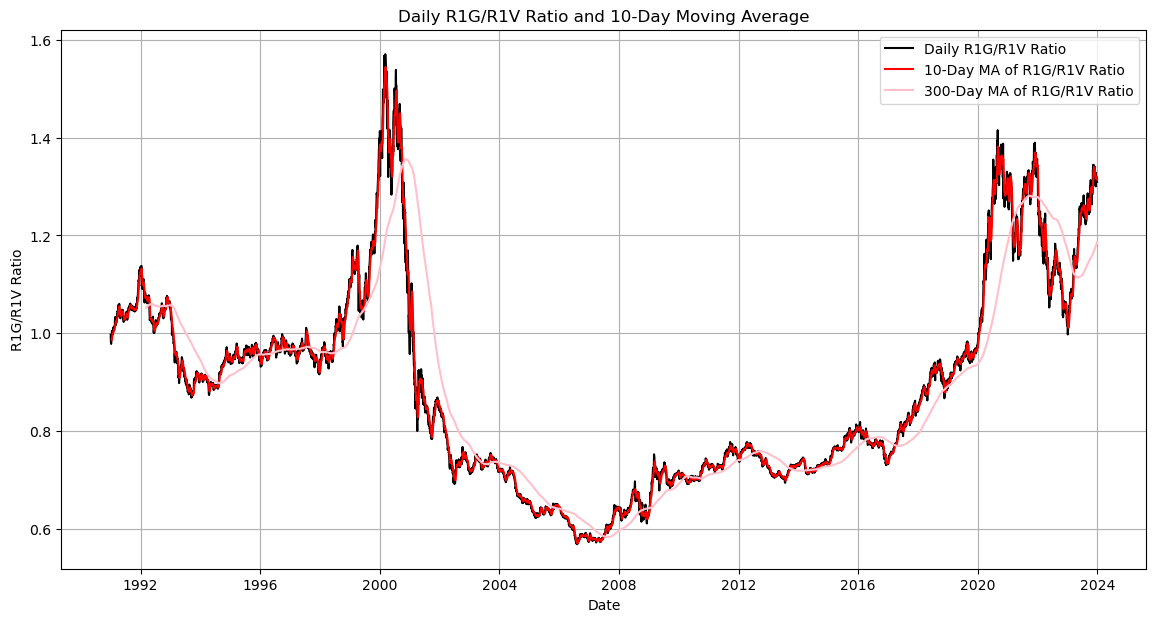

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['ratio'], label='Daily R1G/R1V Ratio', color='black')
plt.plot(df['Date'], df['R1G_R1V_Ratio_10day_MA'], label='10-Day MA of R1G/R1V Ratio', color='red')
plt.plot(df['Date'], df['R1G_R1V_Ratio_300day_MA'], label='300-Day MA of R1G/R1V Ratio', color='pink')
plt.title('Daily R1G/R1V Ratio and 10-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('R1G/R1V Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# finding where points have crossed 

df['Cross'] = 0  # Initialize the column with 0
df.loc[df['R1G_R1V_Ratio_10day_MA'] > df['R1G_R1V_Ratio_300day_MA'], 'Cross'] = 1
df.loc[df['R1G_R1V_Ratio_10day_MA'] < df['R1G_R1V_Ratio_300day_MA'], 'Cross'] = -1

# Now we find the points where the cross changes from 1 to -1 or vice versa
cross_points = df[df['Cross'].diff() != 0]

# Filter out the first 300 days because the 300-day MA won't be valid until then
cross_points = cross_points[cross_points.index >= 300]

cross_points[['Date', 'R1G_R1V_Ratio_10day_MA', 'R1G_R1V_Ratio_300day_MA', 'Cross']]
cross_points = pd.merge(cross_points, df[['Date', 'R1G value', 'R1V value']], on='Date', how='left')
cross_points = cross_points.drop(['R1G value_y', 'R1V value_y'], axis=1)
cross_points
output= '/Users/apple/Desktop/y4s2/capstone/week 2 data set/cross_points.xlsx'
cross_points.to_excel(output, index=False)

cross_points

,Date,R1G,R1V,R1G value_x,R1V value_x,ratio,R1G_R1V_Ratio_10day_MA,R1G_R1V_Ratio_300day_MA,Cross
0,1992-04-23,-0.000075,0.006410,133.830000,130.310000,1.027013,1.057315,1.059086,-1
1,1992-09-22,-0.012869,-0.008990,139.610000,132.280000,1.055413,1.056524,1.055916,1
2,1992-09-28,0.002976,0.004764,138.190000,132.870000,1.040039,1.054472,1.056125,-1
3,1992-11-12,0.001110,0.000893,144.290000,134.460000,1.073107,1.057938,1.055836,1
4,1993-01-04,-0.004517,0.000283,147.650000,141.510000,1.043389,1.055598,1.057362,-1
...,...,...,...,...,...,...,...,...,...
59,2021-07-08,-0.007035,-0.010166,2780.126553,2147.778193,1.294420,1.270066,1.269158,1
60,2021-10-08,-0.004179,-0.000496,2808.011539,2204.051172,1.274023,1.280565,1.280705,-1
61,2021-10-18,0.009599,-0.002678,2909.184486,2227.849163,1.305827,1.282357,1.279995,1
62,2022-01-14,0.002425,-0.001676,2917.443482,2339.240122,1.247176,1.275926,1.276158,-1


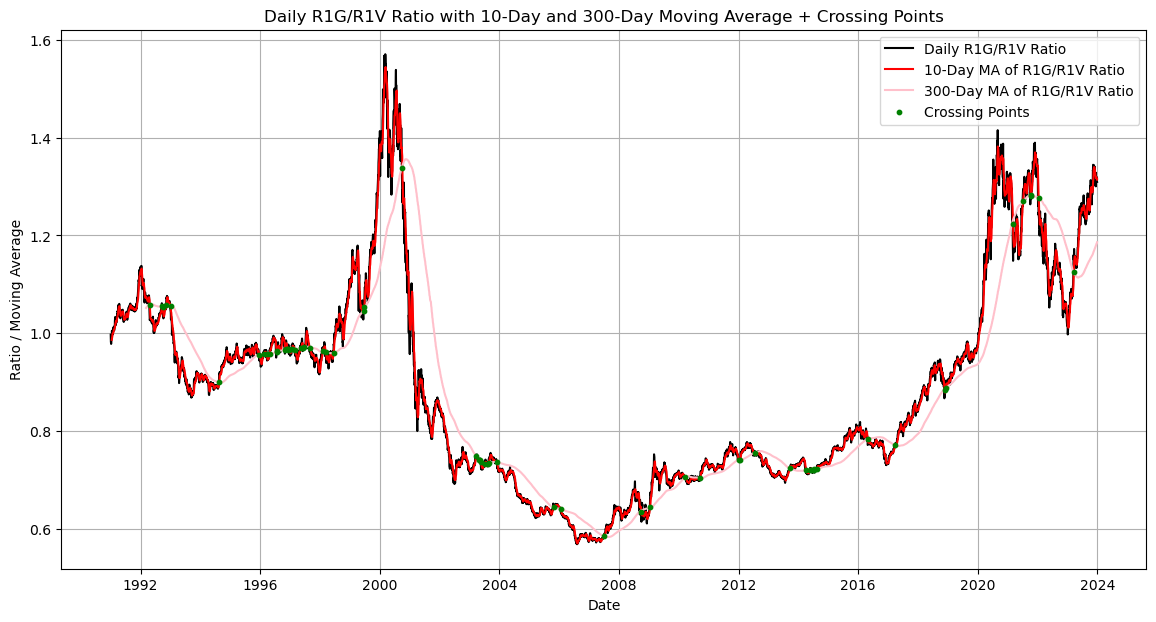

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['ratio'], label='Daily R1G/R1V Ratio', color='black')
plt.plot(df['Date'], df['R1G_R1V_Ratio_10day_MA'], label='10-Day MA of R1G/R1V Ratio', color='red')
plt.plot(df['Date'], df['R1G_R1V_Ratio_300day_MA'], label='300-Day MA of R1G/R1V Ratio', color='pink')
plt.scatter(cross_points['Date'], cross_points['R1G_R1V_Ratio_10day_MA'], color='green', label='Crossing Points', zorder=2, s=10)
plt.title('Daily R1G/R1V Ratio with 10-Day and 300-Day Moving Average + Crossing Points')
plt.xlabel('Date')
plt.ylabel('Ratio / Moving Average')
plt.legend()
plt.grid(True)
plt.show()

measuring return 

In [12]:
# For the benchmark, we will assume a 50/50 split between R1G and R1V from the start and held until the end
initial_investment = 10000
half_investment = initial_investment / 2

# Prices at the start (assuming the prices are in the first row of the dataset)
initial_r1g_price = df.iloc[0]['R1G value']
initial_r1v_price = df.iloc[0]['R1V value']

# Calculate the number of units bought at the start with half the initial investment for each index
r1g_units_benchmark = half_investment / initial_r1g_price
r1v_units_benchmark = half_investment / initial_r1v_price

# Prices at the end (assuming the prices are in the last row of the dataset)
final_r1g_price = df.iloc[-1]['R1G value']
final_r1v_price = df.iloc[-1]['R1V value']

# Calculate the final value of the investment for each index
final_r1g_value_benchmark = r1g_units_benchmark * final_r1g_price
final_r1v_value_benchmark = r1v_units_benchmark * final_r1v_price

# The total final value is the sum of the final values for R1G and R1V
total_final_value_benchmark = final_r1g_value_benchmark + final_r1v_value_benchmark
total_final_value_benchmark




278640.8127262478

In [14]:
# Define initial capital
initial_capital = 10000

# Allocate initial capital between R1G and R1V
r1g_capital = initial_capital / 2
r1v_capital = initial_capital / 2

# Initialize holdings
r1g_units = r1g_capital / cross_points.iloc[0]['R1G value_x']
r1v_units = r1v_capital / cross_points.iloc[0]['R1V value_x']


# Simulate the trading strategy based on the cross points
for index, row in cross_points.iterrows():
    # Get the current total value of the portfolio
    current_portfolio_value = r1g_units * row['R1G value_x'] + r1v_units * row['R1V value_x']
    
    # On a buy signal (Cross == 1), buy all R1G and sell all R1V
    if row['Cross'] == 1:
        r1g_capital = current_portfolio_value * 1
        r1v_capital = current_portfolio_value * 0
    # On a sell signal (Cross == -1), allocate 60% to R1V and 40% to R1G
    elif row['Cross'] == -1:
        r1g_capital = current_portfolio_value * 0
        r1v_capital = current_portfolio_value * 1
    
    # Calculate the new amount of R1G and R1V units based on the updated capital allocation
    r1g_units = r1g_capital / row['R1G value_x']
    r1v_units = r1v_capital / row['R1V value_x']

# After going through all signals, calculate the total value for both R1G and R1V
final_r1g_value = r1g_units * cross_points.iloc[-1]['R1G value_x']
final_r1v_value = r1v_units * cross_points.iloc[-1]['R1V value_x']

# The final portfolio value is the sum of the final values of R1G and R1V
final_portfolio_value = final_r1g_value + final_r1v_value

# The total absolute return is the final portfolio value minus the initial capital
total_absolute_return = final_portfolio_value - initial_capital


print(total_absolute_return)

289361.9757831725


In [15]:
excess_return= total_absolute_return - total_final_value_benchmark

excess_return

10721.163056924648